---
author: Delvin Mackenzie
date: 11/02/2019
contact: delvin@uw.edu

---


<h3>Step 0.1: Import dependencies</h3>

In [16]:
#import dependencies 
from numpy.random import seed
from numpy.random import randn
from scipy import stats
import numpy as np

import math  

import seaborn as sns
sns.set(style="darkgrid")
from matplotlib import pyplot as plt

import pandas as pd
import os

<h3>Step 1.1 Import data</h3>

In [17]:
#check list of files in data directory 
print(os.listdir("./data"))

['newdata_iperf_m5d_48 - newdata_iperf_m5d_48.csv', 'ycruncher_m5d_aug13_48-instances - ycruncher_m5d_aug13.csv', 'm5d_48vms_pgbench_2ndtry - m5d_48vms_pgbench_2ndtry.csv', 'm5d-sysbench-dedicated-host-10-24-2019 - m5d-sysbench-dedicated-host-10-24-2019.csv', 'y_cruncher_08_22_2019 - y_cruncher_08_22_2019.csv', 'm5d-y-cruncher-idle-mode-10-27-2019 - m5d-ycruncher-p-10-27-2019.csv']


In [56]:
data_iperf_separate = 'newdata_iperf_m5d_48 - newdata_iperf_m5d_48.csv'
#iperf_together = ''
data_y_cruncher_w_idle_vms = 'ycruncher_m5d_aug13_48-instances - ycruncher_m5d_aug13.csv'
data_y_cruncher_wo_idle_vms = 'y_cruncher_08_22_2019 - y_cruncher_08_22_2019.csv'
data_y_cruncher_idle_shutdown = 'm5d-y-cruncher-idle-mode-10-27-2019 - m5d-ycruncher-p-10-27-2019.csv'

data_pgbench = 'm5d_48vms_pgbench_2ndtry - m5d_48vms_pgbench_2ndtry.csv'

data_sysbench = 'm5d-sysbench-dedicated-host-10-24-2019 - m5d-sysbench-dedicated-host-10-24-2019.csv'

In [73]:
#import csv files (header start row may very so change if necessary)
df_sysbench = pd.read_csv("./data/" + data_sysbench, header = 1)
df_pgbench = pd.read_csv("./data/" + data_pgbench, header = 0)
df_iperf_s = pd.read_csv("./data/" + data_iperf_separate, header = 0)
df_y_cruncher_no_idle = pd.read_csv("./data/" + data_y_cruncher_w_idle_vms, header = 0)
df_y_cruncher_idle = pd.read_csv("./data/" + data_y_cruncher_wo_idle_vms, header = 0)
df_y_cruncher_shutdown = pd.read_csv("./data/" + data_y_cruncher_idle_shutdown, header = 0)

In [20]:
#we want to reorganize our information so we can match the format Ed had, we need to replace instanceID with a vmId
#we also need to drop irrelevant columns and remove NaN rows
#we will first perform a step by step with the df_sysbench dataframe, then we will create a function that will
#do it for us for a list of dataframes.

In [21]:
#group by instance id as vmid and setId, just replace instance id with 1~48 then sort by the two ids

#df_sysbench.drop(columns = ['testOption', 'experimentID', 'instanceType', 'thread-num', 'Standard deviation', 'Average'], inplace=True)



In [39]:
df_sysbench.tail()

,experimentID,setId,instanceID,instanceType,wallTime,testOption,per-request-avg-time,total-time,thread-num,Standard deviation,Average
11802,1571978908-47,47.0,i-001050c1bdb37b36e,m5d.large,9.039338,--test=cpu --cpu-max-prime=2000000 --num-threa...,1802.94ms,9.0184s,2.0,NaN,NaN
11803,1571978908-47,47.0,i-001050c1bdb37b36e,m5d.large,9.038812,--test=cpu --cpu-max-prime=2000000 --num-threa...,1802.94ms,9.0181s,2.0,NaN,NaN
11804,1571978908-47,47.0,i-001050c1bdb37b36e,m5d.large,9.054751,--test=cpu --cpu-max-prime=2000000 --num-threa...,1805.59ms,9.0335s,2.0,NaN,NaN
11805,1571978908-47,47.0,i-001050c1bdb37b36e,m5d.large,9.040745,--test=cpu --cpu-max-prime=2000000 --num-threa...,1802.91ms,9.0192s,2.0,NaN,NaN
11806,1571978908-47,47.0,i-001050c1bdb37b36e,m5d.large,9.039167,--test=cpu --cpu-max-prime=2000000 --num-threa...,1802.77ms,9.0187s,2.0,0.005639,9.043167


In [40]:
#create eds format, with all datasets... we need: setId, instanceId, walltime (maybe more later...)
df_test = df_sysbench

In [41]:
#drop columns
df_test.drop(columns = ['per-request-avg-time', 'total-time','testOption', 'experimentID', 'instanceType', 'thread-num', 'Standard deviation', 'Average'], inplace=True)

In [42]:
#sort by setId first
df_test.sort_values(by = ['setId','instanceID'], ascending=False, inplace=True)

In [43]:
#df_sysbench.tail(60)

In [44]:
#replace instanceID with numerical vmID
df_test['vmId'] = pd.factorize(df_test.instanceID)[0] + 1

In [45]:
#sort by vmId then setId 
df_test.sort_values(by = ['setId','vmId'], inplace=True)
df_test.dropna(inplace=True)

In [46]:
#check vmId values
df_test.tail()

,setId,instanceID,wallTime,vmId
11802,47.0,i-001050c1bdb37b36e,9.039338,1
11803,47.0,i-001050c1bdb37b36e,9.038812,1
11804,47.0,i-001050c1bdb37b36e,9.054751,1
11805,47.0,i-001050c1bdb37b36e,9.040745,1
11806,47.0,i-001050c1bdb37b36e,9.039167,1


In [47]:
#drop instanceID
df_test.drop(columns=['instanceID'], inplace=True)

In [48]:
#df_sysbench.tail(60)

In [49]:
#finally reverse setId to match eds version! #change 48 if necessary to match vm count
vm_count = 48
df_test['setId'] = pd.factorize(df_sysbench.setId)[0]- vm_count + 1

In [50]:
#absolute value
df_test['setId'] = df_test['setId'].abs()

In [51]:
#add + 1 for off by 1 error
df_test['setId'] += 1

In [54]:
df_test.tail()

,setId,wallTime,vmId
11802,1,9.039338,1
11803,1,9.038812,1
11804,1,9.054751,1
11805,1,9.040745,1
11806,1,9.039167,1


In [75]:
#create method that to streamline the above process for the rest of the dataframes
def addVmId(list_df, sorting=False):
    '''takes list of dataframes as arg'''
    for df in list_df:
        df.sort_values(by = ['setId','instanceID'], ascending=sorting, inplace=True)
        df['vmId'] = pd.factorize(df.instanceID)[0] + 1
        df.sort_values(by = ['setId','vmId'], inplace=True)
        df.dropna(inplace=True)
        
        #TODO: reverse setId 
        vm_count = 48
        df['setId'] = pd.factorize(df.setId)[0]- vm_count + 1
        df['setId'] = df['setId'].abs()
        df['setId'] += 1
        
        df.drop(columns=['instanceID'], inplace=True) #drop instanceId
        if 'wallTime' in df.columns:
            df.rename(columns={'wallTime': df.name + '_wallTime'}, inplace=True)

<h3>Step 1.2: Drop columns</h3>

In [74]:
#drop columns (may need to change column names depending on csv file column headers)
#keep only setId, instanceID, and wallTime (iperf has up,down, and total time instead)
df_iperf_s.drop(columns = ['vmId','Unnamed: 12', 'Unnamed: 13', 'cmd', 'bandwidthUpload', 'bandwitdhDownload', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'interval', 'experimentID', 'instanceType'], inplace=True)
df_sysbench.drop(columns = ['per-request-avg-time', 'total-time','testOption', 'experimentID', 'instanceType', 'thread-num', 'Standard deviation', 'Average'], inplace=True)
df_pgbench.drop(columns = ['wallTime', 'threads','scaleFactor', 'clients', 'Unnamed: 12', 'mountPoint', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16','Unnamed: 17', 'experimentID', 'instanceType', 'duration', 'queryMode', 'transactionsType'], inplace=True)
df_y_cruncher_idle.drop(df_y_cruncher_idle.columns[[1,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18]], axis = 1, inplace=True)
df_y_cruncher_no_idle.drop(df_y_cruncher_no_idle.columns[[1,3,4,5,6,7,8,9,10,11,12,13,14,16,17]], axis = 1, inplace=True)
df_y_cruncher_shutdown.drop(df_y_cruncher_shutdown.columns[[1,3,4,5,6,7,8,9,10,11,12,13,14,16,17]], axis = 1, inplace=True)

#name df for easier distinction when iterating
df_iperf_s.name = 'iperf_single'
df_sysbench.name = 'sysbench'
df_pgbench.name = 'pgbench'
df_y_cruncher_idle.name = 'y_cruncher_idle'
df_y_cruncher_no_idle.name = 'y_cruncher_no_idle'
df_y_cruncher_shutdown.name = 'y_cruncher_shutdown'

In [70]:
#df_iperf_s.head(250)
df_iperf_s.head()

,instanceID,Upload,Download,Total,setId
0,i-024fbd0ce0d3c4378,9.57,8.87,18.44,1.0
1,i-024fbd0ce0d3c4378,9.47,9.05,18.52,1.0
2,i-024fbd0ce0d3c4378,9.44,8.88,18.32,1.0
3,i-024fbd0ce0d3c4378,9.45,9.13,18.58,1.0
4,i-024fbd0ce0d3c4378,9.48,8.90,18.38,1.0


In [76]:
#add vmId for each benchmark and wrangle data into Ed's format
list_raw_df = [df_sysbench, df_pgbench, df_y_cruncher_no_idle,df_y_cruncher_idle, df_y_cruncher_shutdown]
#iperf needs to have normal sorting 
list_iperf = [df_iperf_s]

addVmId(list_raw_df)
addVmId(list_iperf, True)

In [77]:
#add iperf so we can create a dataframe
list_raw_df += list_iperf

In [78]:
#merge list_raw_df on setId and vmId, 
#if values are missing, take the average by setId and vmId


,setId,y_cruncher_idle_wallTime,vmId
304,48,6.707850,1
305,48,6.537621,1
306,48,6.522408,1
307,48,6.516153,1
308,48,6.591982,1


In [244]:
#make sure all cells are int64/float64


In [245]:
#cache the csv file for record and used in other analysis

In [ ]:
#clean up / write text explainations for each section...

In [ ]:
#TODO: create csv for summary tab for google sheets

In [ ]:
#check to see if dropped


<h2>Merge y-cruncher data</h2>

In [79]:
# #add column for experiment type and tenants
# df_y_cruncher_no_idle['experimentType'] = 'no idle'
# df_y_cruncher_idle['experimentType'] = 'with idle'
# df_y_cruncher_shutdown['experimentType'] = 'shutdown idle'

# vmCount = 48 #48 vms on m5d, change if running different configuration

# df_y_cruncher_no_idle['tenants'] = vmCount - df_y_cruncher_no_idle.iloc[:, 0]
# df_y_cruncher_idle['tenants'] = vmCount - df_y_cruncher_idle.iloc[:, 0]
# df_y_cruncher_shutdown['tenants'] = vmCount - df_y_cruncher_shutdown.iloc[:, 0]

In [114]:
#merge tables
df_y_cruncher = pd.concat([df_y_cruncher_idle, df_y_cruncher_no_idle, df_y_cruncher_shutdown],ignore_index=True, sort = True)

In [81]:
df_y_cruncher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22344 entries, 304 to 3574
Data columns (total 6 columns):
experimentType                  22344 non-null object
setId                           22344 non-null int64
vmId                            22344 non-null int64
y_cruncher_idle_wallTime        9408 non-null float64
y_cruncher_no_idle_wallTime     9408 non-null float64
y_cruncher_shutdown_wallTime    3528 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.2+ MB


In [82]:
# #drop % sign from data
# df_y_cruncher['cpuUtilization'] = df_y_cruncher['cpuUtilization'].str.rstrip('%').astype('float')
# df_y_cruncher['multiCoreEfficiency'] = df_y_cruncher['multiCoreEfficiency'].str.rstrip('%').astype('float')

In [83]:
df_y_cruncher.head()

,experimentType,setId,vmId,y_cruncher_idle_wallTime,y_cruncher_no_idle_wallTime,y_cruncher_shutdown_wallTime
304,with idle,48,1,6.707850,NaN,NaN
305,with idle,48,1,6.537621,NaN,NaN
306,with idle,48,1,6.522408,NaN,NaN
307,with idle,48,1,6.516153,NaN,NaN
308,with idle,48,1,6.591982,NaN,NaN


<h2>Visualize y-cruncher data</h2>

/Users/dell/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/dell/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


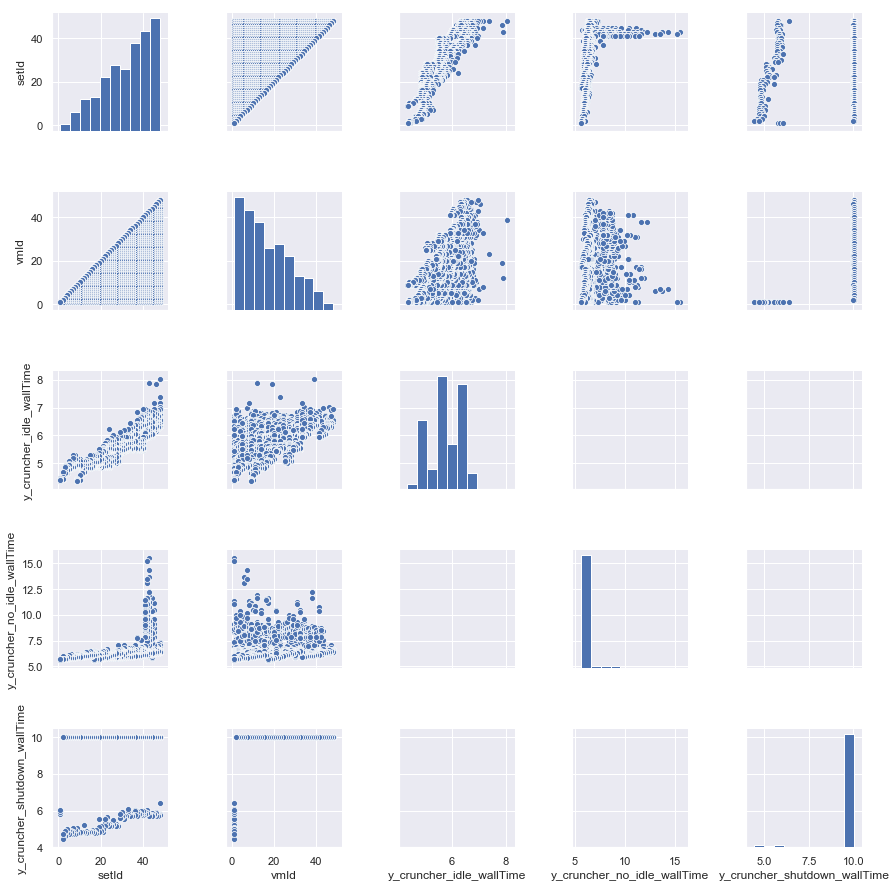

In [84]:
#plot overlay of datasets for y_cruncher
sns.pairplot(df_y_cruncher)

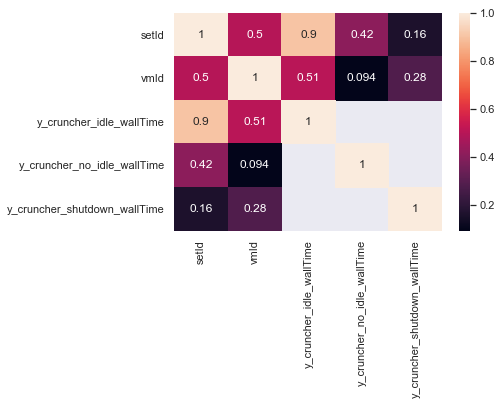

In [85]:
#graph the 3 different y-cruncher results 
sns.heatmap(df_y_cruncher.corr(), annot=True)

We can see there is a correlation between tenants and wall time. That's good!

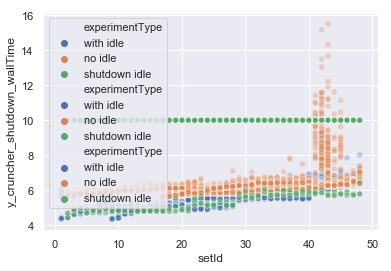

In [97]:
splot = sns.scatterplot(x='setId',y ='y_cruncher_idle_wallTime', hue='experimentType', data=df_y_cruncher, alpha=0.3)

splot = sns.scatterplot(x='setId',y ='y_cruncher_no_idle_wallTime', hue='experimentType', data=df_y_cruncher, alpha=0.3)
splot = sns.scatterplot(x='setId',y ='y_cruncher_shutdown_wallTime', hue='experimentType', data=df_y_cruncher, alpha=0.5)


In [ ]:
#make normal line graph for the 3 y-crunchers...


These visualizations are nice, but I think we need to group by setId and vmId to make a more meaningful inference.

In [129]:
#group by setId and vmId, then visualize the lines
#test = pd.concat([df_y_cruncher_idle, df_y_cruncher_no_idle, df_y_cruncher_shutdown],ignore_index=True, sort = True, join='outer')

In [168]:
test = df_y_cruncher_idle;
test['y_cruncher_shutdown_wallTime'] = df_y_cruncher_shutdown['y_cruncher_shutdown_wallTime']
test['df_y_cruncher_no_idle_wallTime'] = df_y_cruncher_no_idle['y_cruncher_no_idle_wallTime']

In [172]:
test.tail(250)

,setId,y_cruncher_idle_wallTime,vmId,y_cruncher_shutdown_wallTime,df_y_cruncher_no_idle_wallTime
9198,8,5.280982,5,NaN,5.891424
9199,8,5.014191,5,NaN,5.881285
9160,8,4.950099,6,NaN,5.857719
9161,8,4.908187,6,NaN,5.850199
9162,8,4.888270,6,NaN,5.850779
9163,8,4.906091,6,NaN,5.856186
9164,8,4.933088,6,NaN,5.855136
9165,8,4.908545,6,NaN,5.861864
9166,8,4.891746,6,NaN,5.843933
9167,8,5.014997,6,NaN,5.862197


In [165]:
df_new = df_y_cruncher_idle.merge(
    df_y_cruncher_no_idle,
    left_on=['setId', 'vmId'],
    right_on=['setId', 'vmId'],
    how='right'
)

In [166]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75264 entries, 0 to 75263
Data columns (total 4 columns):
setId                          75264 non-null int64
y_cruncher_idle_wallTime       75264 non-null float64
vmId                           75264 non-null int64
y_cruncher_no_idle_wallTime    75264 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.9 MB


In [158]:
df_new.head()

,setId,y_cruncher_idle_wallTime,vmId,y_cruncher_shutdown_wallTime
0,48,6.707850,1,6.408017
1,48,6.707850,1,5.812473
2,48,6.707850,1,5.782898
3,48,6.537621,1,6.408017
4,48,6.537621,1,5.812473


In [126]:
test = test.groupby('setId')

In [127]:
#merge all datasets, and try out of the box models
test.head()

,setId,vmId,y_cruncher_idle_wallTime,y_cruncher_no_idle_wallTime,y_cruncher_shutdown_wallTime
0,48,1,6.707850,NaN,NaN
1,48,1,6.537621,NaN,NaN
2,48,1,6.522408,NaN,NaN
3,48,1,6.516153,NaN,NaN
4,48,1,6.591982,NaN,NaN
384,47,1,6.582040,NaN,NaN
385,47,1,6.484905,NaN,NaN
386,47,1,6.505660,NaN,NaN
387,47,1,6.506780,NaN,NaN
388,47,1,6.626415,NaN,NaN


In [ ]:
df_pgbench.head()

In [10]:
df = pd.concat([df_iperf_s, df_sysbench, df_pgbench, df_y_cruncher],keys='setId' ,sort = True)

NameError: name 'df_y_cruncher' is not defined

In [11]:
df.head()

NameError: name 'df' is not defined

<h3> Step: Modeling</h3>

In [12]:
#import ML dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import metrics

from sklearn.preprocessing import scale

from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
#method to run simple model and outputs confusion matrix, calssification report, and f1-score
def get_model_result(X, y, model = KNeighborsClassifier(), test_size = 0.3):
    '''prints the confusion matrix and classification report and returns fitted model and X, y values'''
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        test_size = test_size,
                                                        random_state = 19,
                                                        stratify = y
                                                      )
    #normalize or not..
    X_train_scale = (X_train)
    X_test_scale = (X_test)
        
    #normalize
#     std_clf = make_pipeline(StandardScaler(), model)
#     std_clf.fit(X_train, y_train)
#     pred_test_std = std_clf.predict(X_test)    
        
        
    model.fit(X_train_scale, y_train)
    y_pred = model.predict(X_test_scale)
    print(model)
    print('Model Score: ')
    print(metrics.accuracy_score(y_test, y_pred))
    
    return X_train, X_test, y_train, y_test, model

In [14]:
#method return x and y(setId) for models
def splitDfIntoXY(df):
    y = df['setId'].values
    x = df.drop(columns=['setId'])
    return x, y

In [15]:
test = df_y_cruncher.drop(columns=['testStartTime', 'experimentType', 'tenants','multiCoreEfficiency','cpuUtilization'])
test.dropna(inplace= True)

NameError: name 'df_y_cruncher' is not defined

In [18]:
test.describe()

NameError: name 'test' is not defined

In [16]:
x, y = splitDfIntoXY(test)


NameError: name 'test' is not defined

In [17]:
X_train, X_test, y_train, y_test, model = get_model_result(x,y)


NameError: name 'x' is not defined

We can see that throwing y_cruncher data into a model results in a terrible score. Let's try something different.

In [ ]:
#lasso regression, svm(svr), random forest

#or do an average like ed did...make sure to normalize the results
#do a model with all data, single points, averages, std, of each feature, then figureout which features are the best

In [346]:
#create dataframe to mirror Eds original csv; then output csv
df_y_cruncher.describe()

,cpuUtilization,multiCoreEfficiency,setId,tenants,wallTime
count,18960.000000,18960.000000,18960.000000,18960.000000,18960.000000
mean,194.968757,97.484401,15.726160,32.273840,6.046520
std,10.048304,5.024218,11.466953,11.466953,0.655406
min,68.630000,34.320000,0.000000,1.000000,4.358442
25%,196.080000,98.040000,6.000000,24.000000,5.608849
50%,196.410000,98.200000,14.000000,34.000000,6.106870
75%,196.710000,98.350000,24.000000,42.000000,6.424872
max,197.750000,98.880000,47.000000,48.000000,15.525524


In [347]:
#create dataframe to extend Eds version, with more data, and features like standard deviation, 

#####standard deviation - value? average - value? good features?
#feature list: 
#y-cruncher: wall avg, cpu avg, multicore eff avg, std of each 3x
#iperf: average 3x, std 3x 
#pgbench: transactions avg, std
#sysbench: walltime, per request avg time...remove trailing ms, std
####

In [ ]:
#then try an average version...with standard deviation? idk

In [ ]:
#line graph for each of the y-crunchers... normalized performance vs tenants

In [ ]:
#visualize tree features and how useful they are for the model..

In [145]:
#import dedicated host data for y-cruncher, sysbench, iperf, pgbench
#import open cloud data

#create main tab for google sheets
#create csv for summary tab for google sheets

#data wrangling
    #group by set ID
    
#visualization, compare by set ID, find good regression visualizations 
    
#initial models
#train model
    #regression
    #random forest

#test model
    #regression
    #random forest

#feature engineering then model
    #regression
    #random forest

#predict where open cloud data lies for given model
    #test models with real data